22/11/2019

The code here is close to Nielsen. Each activation is treated as a column vector, even the last one which for XOR is just a simple number and is encloded in a shape (1,1) column vector of just one row, i.e if activation value of output neuron is a, then it is computed as np.array([[a]]).

Can easily adapt code here for the MLP excercises and the Iris classification problem.
But you may need to use more than 2 hidden neurons and more than 1 output neuron.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expit


In [ ]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)


In [ ]:
def sigm(z):
    return expit(z)

def sigm_deriv(z):
    a = sigm(z)
    return a * (1 - a)

In [ ]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(2,2)
        self.b2 = np.random.randn(2,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,2)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

In [ ]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])





Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

In [ ]:
#Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

class XOR_MLP2:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 3 neurons
        self.w2 = np.random.randn(3,2)
        self.b2 = np.random.randn(3,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,3)
        self.b3 = np.random.randn(1,1)
    
    def feedforward(self, xs):
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)
        return a3s
    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):
            a1 = x.reshape(2,1)
            z2 = self.w2.dot(a1) + self.b2
            a2 = sigm(z2)
            
            z3 = self.w3.dot(a2) + self.b3
            a3 = sigm(z3)
            
            delta3 = (a3-y) * sigm_deriv(z3)
            
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))
            
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)
            
            cost += ((a3 - y)**2).sum()
        
        n = len(ys)
        
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
    
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
    
xor2 = XOR_MLP2()
xs = xor2.train_inputs.T

print(xor2.feedforward(xs))

epochs = 1000

c = xor2.train(epochs, 3.0)

print(xor2.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)

fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])

plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])
plt.show()


In [ ]:
class MLP:
    # m is the number of inputs, n is the number of neurons in the hidden layer, o is the number of outputs
    def __init__(self, m, n, o):
        np.random.seed(23)
        
        # Hidden layer weights and biases
        self.w2 = np.random.randn(n, m)
        self.b2 = np.random.randn(n, 1)
        
        # Output layer weights and biases
        self.w3 = np.random.randn(o, n)
        self.b3 = np.random.randn(o, 1)

        self.m = m
        self.n = n
        self.o = o

    def feedforward(self, xs):
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)
        return a3s

    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x, y in zip(xs, ys):
            # Reshape x and y to be column vectors
            a1 = x.reshape(self.m, 1)
            y = y.reshape(self.o, 1)

            z2 = self.w2.dot(a1) + self.b2
            a2 = sigm(z2)
            a2 = a2.reshape(self.n, 1)
            
            
            z3 = self.w3.dot(a2) + self.b3
            a3 = sigm(z3)

            a3 = a3.reshape(self.o, 1)
            
            delta3 = (a3 - y) * sigm_deriv(z3)
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))

            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)
            
            cost += ((a3 - y) ** 2).sum()
        
        n = len(ys)
        
        return del_b2 / n, del_w2 / n, del_b3 / n, del_w3 / n, cost / n

    def train(self, epochs, eta):
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2, d_w2, d_b3, d_w3, cost[e] = self.backprop(self.train_inputs, self.train_outputs)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        
        plt.plot(cost)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()
        
        return cost

    def predict(self, xs):
        return self.feedforward(xs)

    def human_readable_feedforward(self, xs):
        a3s = self.feedforward(xs)
        for x, a3 in zip(xs.T, a3s.T):
            print(f'Input: {x} Output: {a3}')


In [ ]:
#MLP but uses cross entropy cost function

class MLP_CrossEntropy:
    def __init__(self, m, n, o):
        np.random.seed(23)
        
        # Hidden layer weights and biases
        self.w2 = np.random.randn(n, m)
        self.b2 = np.random.randn(n, 1)
        
        # Output layer weights and biases
        self.w3 = np.random.randn(o, n)
        self.b3 = np.random.randn(o, 1)

        self.m = m
        self.n = n
        self.o = o

    def feedforward(self, xs):
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)
        return a3s

    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x, y in zip(xs, ys):
            # Reshape x and y to be column vectors
            a1 = x.reshape(self.m, 1)
            y = y.reshape(self.o, 1)

            z2 = self.w2.dot(a1) + self.b2
            a2 = sigm(z2)
            a2 = a2.reshape(self.n, 1)
            
            
            z3 = self.w3.dot(a2) + self.b3
            a3 = sigm(z3)

            a3 = a3.reshape(self.o, 1)
            
            # Cross entropy cost function 
            delta3 = (a3 - y)
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))

            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)
            
            cost += ((a3 - y) ** 2).sum()
        
        n = len(ys)
        
        return del_b2 / n, del_w2 / n, del_b3 / n, del_w3 / n, cost / n

    def train(self, epochs, eta):
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2, d_w2, d_b3, d_w3, cost[e] = self.backprop(self.train_inputs, self.train_outputs)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        
        plt.plot(cost)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()
        
        return cost

    def predict(self, xs):
        return self.feedforward(xs)

    def human_readable_feedforward(self, xs):
        a3s = self.feedforward(xs)
        for x, a3 in zip(xs.T, a3s.T):
            print(f'Input: {x} Output: {a3}')

In [193]:
class generic_MLP:
    def __init__(self, input_size, hidden_layer_sizes, output_size):
        np.random.seed(23)

        #Get number of layers and sizes of each layer
        self.num_layers = len(hidden_layer_sizes) + 1
        self.layer_sizes = [input_size] + hidden_layer_sizes + [output_size]

        #Initialize weights and biases
        self.weights = [np.random.randn(self.layer_sizes[i+1], self.layer_sizes[i]) for i in range(self.num_layers)]
        self.biases = [np.random.randn(self.layer_sizes[i+1], 1) for i in range(self.num_layers)]

        #Print weights and biases shape
        for w, b in zip(self.weights, self.biases):
            print(w.shape, b.shape)


    def feedforward(self, xs):
        actual_outputs = [xs]
        for i in range(self.num_layers):
            #Weighted sum and activation function
            #Actual output -1 because the only actual output is the last layer
            a = sigm(self.weights[i].dot(actual_outputs[-1]) + self.biases[i])
            actual_outputs.append(a)

        return actual_outputs[-1]
    
    def backprop(self, xs, ys):
        del_ws = [np.zeros(w.shape, dtype=float) for w in self.weights]
        del_bs = [np.zeros(b.shape, dtype=float) for b in self.biases]
        cost = 0.0

        for x, y in zip(xs, ys):
            x = x.reshape(self.layer_sizes[0], 1)
            y = y.reshape(self.layer_sizes[-1], 1)

            actual_outputs = [x]
            zs = []
            #Feedforward
            for i in range(self.num_layers):
                z = self.weights[i].dot(actual_outputs[-1]) + self.biases[i]
                zs.append(z)
                a = sigm(z)
                actual_outputs.append(a)
            
            cost += ((actual_outputs[-1] - y) ** 2).sum()

            #Initialize list for deltas
            deltas = [None] * (self.num_layers)
            #Delta for output layer
            deltas[-1] = (actual_outputs[-1] - y) * sigm_deriv(zs[-1])

            #Delta for hidden layers
            for i in reversed(range(self.num_layers-1)):
                deltas[i] = sigm_deriv(zs[i]) * (self.weights[i+1].T.dot(deltas[i+1]))

            #Adjust weights and biases
            for i in range(self.num_layers):
                del_bs[i] += deltas[i]
                del_ws[i] += deltas[i].dot(actual_outputs[i].T)

        n = len(ys)
        #Return average adjustments to weights and biases and cost
        return [del_b / n for del_b in del_bs], [del_w / n for del_w in del_ws], cost / n
        

    def train(self, epochs, eta):
        cost = np.zeros((epochs,))

        for e in range(epochs):
            d_bs, d_ws, cost[e] = self.backprop(self.train_inputs, self.train_outputs)

            for i in range(self.num_layers):
                self.biases[i] += -eta * d_bs[i]
                self.weights[i] += -eta * d_ws[i]

        plt.plot(cost)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()


        return cost
    
    def predict(self, xs):
        return self.feedforward(xs)
    
    def human_readable_feedforward(self, xs):
        outputs = self.feedforward(xs)
        for x, y in zip(xs.T, outputs.T):
            print(f'Input: {x} Output: {y}')



In [198]:
class generic_MLP_CrossEntropy:
    def __init__(self, input_size, hidden_layer_sizes, output_size):
        np.random.seed(23)

        #Get number of layers and sizes of each layer
        self.num_layers = len(hidden_layer_sizes) + 1
        self.layer_sizes = [input_size] + hidden_layer_sizes + [output_size]

        #Initialize weights and biases
        self.weights = [np.random.randn(self.layer_sizes[i+1], self.layer_sizes[i]) for i in range(self.num_layers)]
        self.biases = [np.random.randn(self.layer_sizes[i+1], 1) for i in range(self.num_layers)]

        #Print weights and biases shape
        for w, b in zip(self.weights, self.biases):
            print(w.shape, b.shape)


    def feedforward(self, xs):
        actual_outputs = [xs]
        for i in range(self.num_layers):
            #Weighted sum and activation function
            #Actual output -1 because the only actual output is the last layer
            a = sigm(self.weights[i].dot(actual_outputs[-1]) + self.biases[i])
            actual_outputs.append(a)

        return actual_outputs[-1]
    
    def backprop(self, xs, ys):
        del_ws = [np.zeros(w.shape, dtype=float) for w in self.weights]
        del_bs = [np.zeros(b.shape, dtype=float) for b in self.biases]
        cost = 0.0

        for x, y in zip(xs, ys):
            x = x.reshape(self.layer_sizes[0], 1)
            y = y.reshape(self.layer_sizes[-1], 1)

            actual_outputs = [x]
            zs = []
            #Feedforward
            for i in range(self.num_layers):
                z = self.weights[i].dot(actual_outputs[-1]) + self.biases[i]
                zs.append(z)
                a = sigm(z)
                actual_outputs.append(a)
            
            cost += ((actual_outputs[-1] - y) ** 2).sum()

            #Initialize list for deltas
            deltas = [None] * (self.num_layers)
            #Delta for output layer
            #Cross entropy cost function
            deltas[-1] = (actual_outputs[-1] - y)

            #Delta for hidden layers
            for i in reversed(range(self.num_layers - 1)):
                deltas[i] = sigm_deriv(zs[i]) * (self.weights[i+1].T.dot(deltas[i+1]))

            #Adjust weights and biases
            for i in range(self.num_layers):
                del_bs[i] += deltas[i]
                del_ws[i] += deltas[i].dot(actual_outputs[i].T)

        n = len(ys)
        #Return average adjustments to weights and biases and cost
        return [del_b / n for del_b in del_bs], [del_w / n for del_w in del_ws], cost / n
        

    def train(self, epochs, eta):
        cost = np.zeros((epochs,))

        for e in range(epochs):
            d_bs, d_ws, cost[e] = self.backprop(self.train_inputs, self.train_outputs)

            for i in range(self.num_layers):
                self.biases[i] += -eta * d_bs[i]
                self.weights[i] += -eta * d_ws[i]

        plt.plot(cost)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()


        return cost
    
    def predict(self, xs):
        return self.feedforward(xs)
    
    def human_readable_feedforward(self, xs):
        outputs = self.feedforward(xs)
        for x, y in zip(xs.T, outputs.T):
            print(f'Input: {x} Output: {y}')



In [197]:
class validation_MLP:
    def __init__(self, input_size, hidden_layer_sizes, output_size):
        np.random.seed(23)

        #Get number of layers and sizes of each layer
        self.num_layers = len(hidden_layer_sizes) + 1
        self.layer_sizes = [input_size] + hidden_layer_sizes + [output_size]

        #Initialize weights and biases
        self.weights = [np.random.randn(self.layer_sizes[i+1], self.layer_sizes[i]) for i in range(self.num_layers)]
        self.biases = [np.random.randn(self.layer_sizes[i+1], 1) for i in range(self.num_layers)]

        #Print weights and biases shape
        for w, b in zip(self.weights, self.biases):
            print(w.shape, b.shape)


    def feedforward(self, xs):
        actual_outputs = [xs]
        for i in range(self.num_layers):
            #Weighted sum and activation function
            #Actual output -1 because the only actual output is the last layer
            a = sigm(self.weights[i].dot(actual_outputs[-1]) + self.biases[i])
            actual_outputs.append(a)

        return actual_outputs[-1]
    
    def backprop(self, xs, ys, validation_xs=None, validation_ys=None):
        del_ws = [np.zeros(w.shape, dtype=float) for w in self.weights]
        del_bs = [np.zeros(b.shape, dtype=float) for b in self.biases]
        cost = 0.0
        validation_cost = 0.0

        for x, y in zip(xs, ys):
            x = x.reshape(self.layer_sizes[0], 1)
            y = y.reshape(self.layer_sizes[-1], 1)

            actual_outputs = [x]
            zs = []
            #Feedforward
            for i in range(self.num_layers):
                z = self.weights[i].dot(actual_outputs[-1]) + self.biases[i]
                zs.append(z)
                a = sigm(z)
                actual_outputs.append(a)
            
            cost += ((actual_outputs[-1] - y) ** 2).sum()

            #Initialize list for deltas
            deltas = [None] * (self.num_layers)
            #Delta for output layer
            deltas[-1] = (actual_outputs[-1] - y) * sigm_deriv(zs[-1])

            #Delta for hidden layers
            for i in reversed(range(self.num_layers - 1)):
                deltas[i] = sigm_deriv(zs[i]) * (self.weights[i+1].T.dot(deltas[i+1]))

            #Adjust weights and biases
            for i in range(self.num_layers):
                del_bs[i] += deltas[i]
                del_ws[i] += deltas[i].dot(actual_outputs[i].T)

        if validation_xs is not None and validation_ys is not None:
            # Compute validation cost
            for val_x, val_y in zip(validation_xs, validation_ys):
                val_x = val_x.reshape(self.layer_sizes[0], 1)
                val_y = val_y.reshape(self.layer_sizes[-1], 1)

                val_as = [val_x]
                val_zs = []

                for i in range(self.num_layers):
                    val_z = self.weights[i].dot(val_as[-1]) + self.biases[i]
                    val_zs.append(val_z)
                    val_a = sigm(val_z)
                    val_as.append(val_a)

                validation_cost += ((val_as[-1] - val_y) ** 2).sum()


            

        n = len(ys)
        #Return average adjustments to weights and biases and cost
        return [del_b / n for del_b in del_bs], [del_w / n for del_w in del_ws], cost / n, validation_cost / len(validation_ys)

        

    def train(self, epochs, eta):
        cost = np.zeros((epochs,))
        validation_cost = np.zeros((epochs,))

        for e in range(epochs):
            d_bs, d_ws, cost[e], validation_cost[e] = self.backprop(self.train_inputs, self.train_outputs, self.validation_inputs, self.validation_outputs)


            for i in range(self.num_layers):
                self.biases[i] -= eta * d_bs[i]
                self.weights[i] -= eta * d_ws[i]

        plt.plot(cost, label='Training Cost')
        plt.plot(validation_cost, label='Validation Cost')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.legend()
        plt.show()


        return cost, validation_cost
    
    def predict(self, xs):
        return self.feedforward(xs)
    
    def human_readable_feedforward(self, xs):
        outputs = self.feedforward(xs)
        for x, y in zip(xs.T, outputs.T):
            print(f'Input: {x} Output: {y}')


    

In [ ]:
#Problem 1 

p1_mlp = MLP(3,4,1)

p1_mlp.train_inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
p1_mlp.train_outputs = np.array([0,1,1,0])

xs = p1_mlp.train_inputs.T

print(p1_mlp.feedforward(xs))

# 2000 Iterations
epochs = 2000
learning_rate = 11.0

#For 2000 iternations a learning rate of above 9 or 10 will cause divergence

#Output after 1500 epochs with learning of 9 [[0.00968279 0.97926286 0.98020147 0.02596714]]
#For 1500 and 2000 epochs the 4th element is still 0.025 while the 1st element is 0.009/0.008
#Both are close to 0 but its curious how the first element is so much smaller than the 4th
#The 2nd and 3rd elements are both close close to 1 and similiar in value

c = p1_mlp.train(epochs, learning_rate)

print(p1_mlp.feedforward(xs))


x_axis = np.linspace(1, epochs, epochs, dtype=int)




In [ ]:
#Problem 2 Neural Network with 3 input and 2 output neurons

p2_mlp = MLP(3,4,2)

p2_mlp.train_inputs = np.array([[1,1,0], [1,-1,-1], [-1,1,1], [-1,-1,1], [0,1,-1], [0,-1,-1], [1,1,1]])

p2_mlp.train_outputs = np.array([[1,0], [0,1], [1,1], [1,0], [1,0], [1,1], [1,1]])

xs = p2_mlp.train_inputs.T


epochs = 2000

c = p2_mlp.train(epochs, 15.0)
print("cost: " + str(c[-1]))
print(p2_mlp.human_readable_feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)



In [ ]:
#Problem 3 Transportation Mode Choice

# Gender (Male)0 or (Female)1
# Car ownership 0 , 1 or 2
# Travel cost (Cheap) 0 , (Standard) 1 or (Expensive) 2
# Income (Low) 0, (Medium) 1 or (High) 2

# Output (Bus) [1,0,0] , (Train) [0,1,0] or (Car) [0,0,1]

transport_mlp = MLP(4,6,3)

transport_mlp.train_inputs = np.array([[0,0,0,0], [0,1,0,1], [1,1,0,1], [1,0,0,0], [0,1,0,1], [0,0,1,1], [1,1,1,1], [1,1,2,2], [0,2,2,1], [1,2,2,2]])
transport_mlp.train_outputs = np.array([[1,0,0], [1,0,0], [0,1,0], [1,0,0], [1,0,0], [0,1,0], [0,1,0], [0,0,1], [0,0,1], [0,0,1]])

print(transport_mlp.train_inputs.shape)
print(transport_mlp.train_outputs.shape)

# Initial output
xs = transport_mlp.train_inputs.T
#print(transport_mlp.feedforward(xs))


epochs = 1000
c = transport_mlp.train(epochs, 8.0)
print("cost: " + str(c[-1]))
print(transport_mlp.human_readable_feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)

#Woman, no car, expensive, medium income
xs = np.array([1,0,2,1]).reshape(4,1)
print(transport_mlp.predict(xs))


#Use pandas to copy training inputs into a dataframe and save as csv seperated by commas
df = pd.DataFrame(transport_mlp.train_inputs)
df.to_csv('transport.csv', index=False, header=False, sep=',')


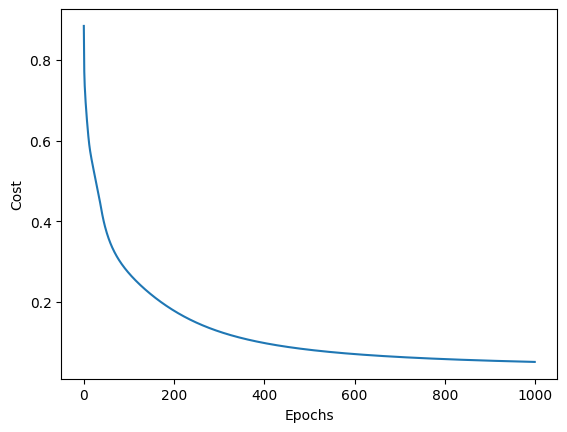

cost: 0.050631902175404635
Input: [5.1 3.5 1.4 0.2] Output: [0.97180693 0.04753721 0.0040563 ]
Input: [4.9 3.  1.4 0.2] Output: [0.95935801 0.06299332 0.00470283]
Input: [4.7 3.2 1.3 0.2] Output: [0.97018247 0.05048564 0.0041346 ]
Input: [4.6 3.1 1.5 0.2] Output: [0.96324119 0.0601934  0.00448857]
Input: [5.  3.6 1.4 0.2] Output: [0.97357129 0.04565986 0.00395171]
Input: [5.4 3.9 1.7 0.4] Output: [0.97176113 0.04761931 0.00405575]
Input: [4.6 3.4 1.4 0.3] Output: [0.97197419 0.04894589 0.0040271 ]
Input: [5.  3.4 1.5 0.2] Output: [0.9687547  0.05178376 0.00422233]
Input: [4.4 2.9 1.4 0.2] Output: [0.96116322 0.06334546 0.00457963]
Input: [4.9 3.1 1.5 0.1] Output: [0.96037471 0.06199944 0.00465542]
Input: [5.4 3.7 1.5 0.2] Output: [0.97213122 0.04662187 0.0040445 ]
Input: [4.8 3.4 1.6 0.2] Output: [0.96782585 0.05409667 0.00426112]
Input: [4.8 3.  1.4 0.1] Output: [0.96110266 0.06127976 0.0046172 ]
Input: [4.3 3.  1.1 0.1] Output: [0.97231166 0.04879044 0.0040035 ]
Input: [5.8 4.  1.2 0

In [196]:
#Problem 4 Iris Dataset
#Import iris_data.csv into a dataframe
df = pd.read_csv('iris_data.csv', header=None)

#Last column is the output
training_outputs = df.iloc[:,-1]

training_outputs = pd.get_dummies(training_outputs)
training_outputs = training_outputs.to_numpy()

#Convert y true and false to 1 and 0
training_outputs = training_outputs.astype(int)


#Drop last column from dataframe
df = df.drop(df.columns[[-1]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)

xs = training_inputs.T


iris_mlp = MLP(4,7,3)

iris_mlp.train_inputs = training_inputs
iris_mlp.train_outputs = training_outputs

#iris_mlp.human_readable_feedforward(xs)

epochs = 1000
c = iris_mlp.train(epochs, 0.8)
print("cost: " + str(c[-1]))
iris_mlp.human_readable_feedforward(xs)


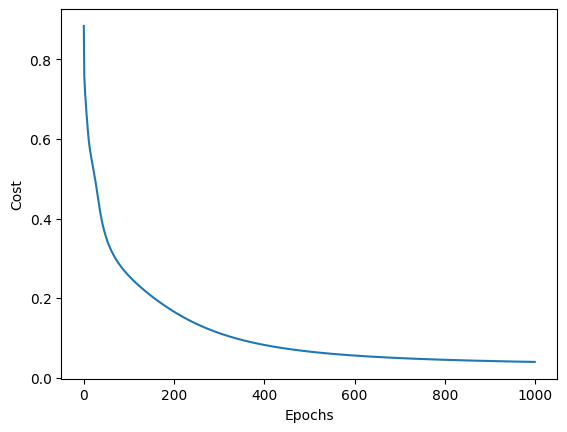

cost: 0.03931446314178053
Input: [5.1 3.5 1.4 0.2] Output: [9.91930345e-01 1.56209421e-02 6.27221593e-04]
Input: [4.9 3.  1.4 0.2] Output: [9.88723505e-01 2.05023259e-02 7.21231392e-04]
Input: [4.7 3.2 1.3 0.2] Output: [9.91510802e-01 1.66960374e-02 6.39360779e-04]
Input: [4.6 3.1 1.5 0.2] Output: [9.89585803e-01 2.01093455e-02 6.95816364e-04]
Input: [5.  3.6 1.4 0.2] Output: [9.92335040e-01 1.51643492e-02 6.14102270e-04]
Input: [5.4 3.9 1.7 0.4] Output: [9.91746899e-01 1.55954715e-02 6.32209982e-04]
Input: [4.6 3.4 1.4 0.3] Output: [9.91843921e-01 1.63472827e-02 6.28280865e-04]
Input: [5.  3.4 1.5 0.2] Output: [9.91171431e-01 1.70107353e-02 6.51077283e-04]
Input: [4.4 2.9 1.4 0.2] Output: [9.88936687e-01 2.13166217e-02 7.12230660e-04]
Input: [4.9 3.1 1.5 0.1] Output: [9.89121408e-01 2.03327056e-02 7.11820046e-04]
Input: [5.4 3.7 1.5 0.2] Output: [9.92015008e-01 1.52438459e-02 6.25027450e-04]
Input: [4.8 3.4 1.6 0.2] Output: [9.90871149e-01 1.80117889e-02 6.59755776e-04]
Input: [4.8 3.

In [166]:
# Iris MLP with Cross Entropy
iris_mlp = MLP_CrossEntropy(4,7,3)

iris_mlp.train_inputs = training_inputs
iris_mlp.train_outputs = training_outputs

#iris_mlp.human_readable_feedforward(xs)

epochs = 1000

c = iris_mlp.train(epochs, 0.19)
print("cost: " + str(c[-1]))

iris_mlp.human_readable_feedforward(xs)

#Initial impressions
#Used 1.0 learning constant same for mean squarred error
# Cross Entropy was 1 second faster than MSE
# Converged faster than MSE
# Diverages easier than MSE
# MSE is more stable than Cross Entropy
# Needs a lower learning constant than MSE

#A learning constant of > 0.2 causes divergence

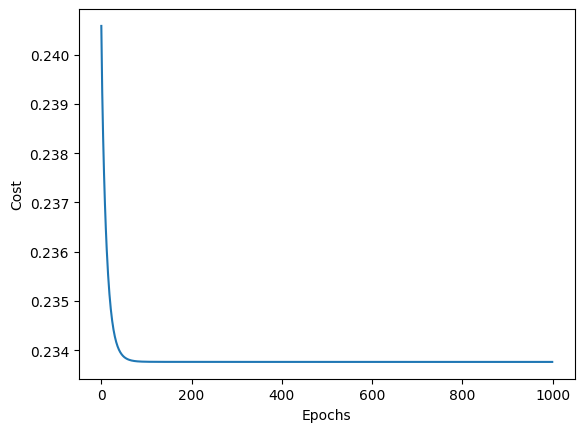

cost: 0.23376522112798606
Input: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] Output: [0.37258311]
Input: [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02] Output: [0.37258311]
Input: [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
 1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
 6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
 2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
 3.613e-01 8.75

In [177]:
# Breast Cancer Wisconsin (Diagnostic) Data Set

#Import bc_data.csv into a dataframe

df = pd.read_csv('bc_data.csv', header=None)

#1st column is id drop it
df = df.drop(df.columns[[0]], axis=1)

#Drop 1st row from dataframe
df = df.drop(df.index[0])

#1st column is diagnosis use it as output
training_outputs = df.iloc[:,0]

#Convert M and B to 1 and 0
training_outputs = np.where(training_outputs == 'M', 1, 0)

#Convert training_outputs to numpy array
training_outputs = training_outputs.astype(int)

#Drop 1st column from dataframe
df = df.drop(df.columns[[0]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)


bc_mlp = MLP(30,10,1)

bc_mlp.train_inputs = training_inputs
bc_mlp.train_outputs = training_outputs

xs = training_inputs.T

#bc_mlp.human_readable_feedforward(xs)

epochs = 1000

c = bc_mlp.train(epochs, 0.1)

print("cost: " + str(c[-1]))

bc_mlp.human_readable_feedforward(xs)


#Initially did 30 neurons in hidden layer and 1 output neuron
#Highest accuracy was 0.70 and 0.22


(7, 4) (7, 1)
(3, 7) (3, 1)
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


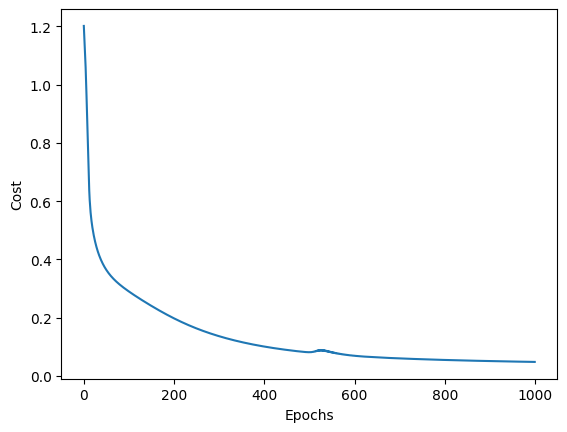

cost: 0.04825903815249455
Iris Dataset using generic MLP Cross Entropy
(7, 4) (7, 1)
(3, 7) (3, 1)


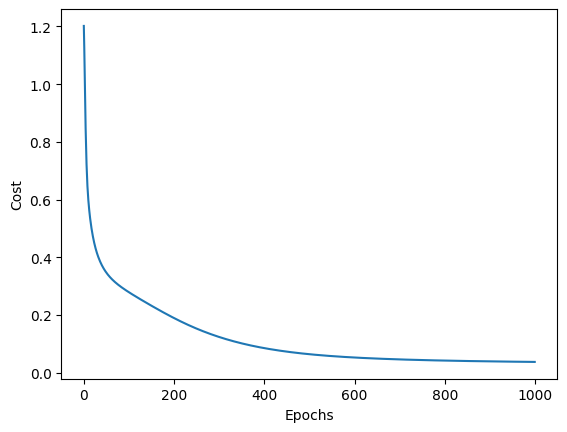

cost: 0.03770566386307916


In [200]:
#Problem 4 Iris Dataset  using generic MLP
#Import iris_data.csv into a dataframe
df = pd.read_csv('iris_data.csv', header=None)

#Last column is the output
training_outputs = df.iloc[:,-1]

training_outputs = pd.get_dummies(training_outputs)

training_outputs = training_outputs.to_numpy()

#Convert y true and false to 1 and 0
training_outputs = training_outputs.astype(int)


#Drop last column from dataframe
df = df.drop(df.columns[[-1]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)

xs = training_inputs.T


input_size = 4
hidden_layer_sizes = [7]
output_size = 3

iris_mlp = generic_MLP(input_size, hidden_layer_sizes, output_size)

iris_mlp.train_inputs = training_inputs
iris_mlp.train_outputs = training_outputs


epochs = 1000

c = iris_mlp.train(epochs, 0.8)
print("cost: " + str(c[-1]))
#iris_mlp.human_readable_feedforward(xs)


# Adding an extra hidden layer with 25 neurons cost graph is smoother
# Accuracy seems to be similiar to the previous MLP if not slightly worse

#Problem 4 Iris Dataset  using generic MLP Cross Entropy

print('Iris Dataset using generic MLP Cross Entropy')

input_size = 4
hidden_layer_sizes = [7]
output_size = 3

ciris_mlp = generic_MLP_CrossEntropy(input_size, hidden_layer_sizes, output_size)

ciris_mlp.train_inputs = training_inputs
ciris_mlp.train_outputs = training_outputs

epochs = 1000

c = ciris_mlp.train(epochs, 0.19)
print("cost: " + str(c[-1]))
#ciris_mlp.human_readable_feedforward(xs)



In [ ]:
#Breast Cancer Wisconsin (Diagnostic) Data Set using generic MLP

df = pd.read_csv('bc_data.csv', header=None)

#1st column is id drop it
df = df.drop(df.columns[[0]], axis=1)

#Drop 1st row from dataframe
df = df.drop(df.index[0])

#1st column is diagnosis use it as output
training_outputs = df.iloc[:,0]

#Convert M and B to 1 and 0
training_outputs = np.where(training_outputs == 'M', 1, 0)

#Convert training_outputs to numpy array
training_outputs = training_outputs.astype(int)

#Drop 1st column from dataframe
df = df.drop(df.columns[[0]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)


input_size = 30
hidden_layer_sizes = [15,15]
output_size = 1

bc_mlp = generic_MLP(input_size, hidden_layer_sizes, output_size)

bc_mlp.train_inputs = training_inputs
bc_mlp.train_outputs = training_outputs

xs = training_inputs.T

bc_mlp.human_readable_feedforward(xs)

epochs = 1000

c = bc_mlp.train(epochs, 0.028)

bc_mlp.human_readable_feedforward(xs)


In [ ]:
# 2 Hidden layers cross entropy

#Breast Cancer Wisconsin (Diagnostic) Data Set using generic MLP

df = pd.read_csv('bc_data.csv', header=None)

#1st column is id drop it
df = df.drop(df.columns[[0]], axis=1)

#Drop 1st row from dataframe
df = df.drop(df.index[0])

#1st column is diagnosis use it as output
training_outputs = df.iloc[:,0]

#Convert M and B to 1 and 0
training_outputs = np.where(training_outputs == 'M', 1, 0)

#Convert training_outputs to numpy array
training_outputs = training_outputs.astype(int)

#Drop 1st column from dataframe
df = df.drop(df.columns[[0]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)


input_size = 30
hidden_layer_sizes = [15,15]
output_size = 1

bc_mlp = generic_MLP_CrossEntropy(input_size, hidden_layer_sizes, output_size)

bc_mlp.train_inputs = training_inputs
bc_mlp.train_outputs = training_outputs

xs = training_inputs.T

bc_mlp.human_readable_feedforward(xs)

epochs = 1000

c = bc_mlp.train(epochs, 0.028)

bc_mlp.human_readable_feedforward(xs)


In [ ]:
# Get 10 percent of breast cancer data and use it as test data

df = pd.read_csv('bc_data.csv', header=None)

#1st column is id drop it
df = df.drop(df.columns[[0]], axis=1)



#Drop 1st row from dataframe
df = df.drop(df.index[0])


#Convert M and B to 1 and 0 in 1st column
df.iloc[:,0] = np.where(df.iloc[:,0] == 'M', 1, 0)

total_rows = df.shape[0]
rows_to_select = int(0.1 * total_rows)
random_rows = df.sample(n=rows_to_select, random_state=42)

random_rows = random_rows.reset_index(drop=True)

#Get output column
test_outputs = random_rows.iloc[:,0]

#Get input columns
test_inputs = random_rows.iloc[:,1:]

#Convert to numpy array
test_outputs = test_outputs.to_numpy()
test_inputs = test_inputs.to_numpy()

#Clean up data
test_outputs = test_outputs.astype(int)
test_inputs = test_inputs.astype(float)



In [ ]:
#Breast Cancer Wisconsin (Diagnostic) Data Set using validation MLP

df = pd.read_csv('bc_data.csv', header=None)

#1st column is id drop it
df = df.drop(df.columns[[0]], axis=1)

#Drop 1st row from dataframe
df = df.drop(df.index[0])

#1st column is diagnosis use it as output
training_outputs = df.iloc[:,0]

#Convert M and B to 1 and 0
training_outputs = np.where(training_outputs == 'M', 1, 0)

#Convert training_outputs to numpy array
training_outputs = training_outputs.astype(int)

#Drop 1st column from dataframe
df = df.drop(df.columns[[0]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)


input_size = 30
hidden_layer_sizes = [5,2]
output_size = 1

bc_mlp = validation_MLP(input_size, hidden_layer_sizes, output_size)

bc_mlp.train_inputs = training_inputs
bc_mlp.train_outputs = training_outputs

bc_mlp.validation_inputs = test_inputs
bc_mlp.validation_outputs = test_outputs

xs = training_inputs.T

#bc_mlp.human_readable_feedforward(xs)

epochs = 1000

c, validation_c = bc_mlp.train(epochs, 0.5)

bc_mlp.human_readable_feedforward(xs)



In [ ]:
# validation data iris dataset
df = pd.read_csv('iris_data.csv', header=None)

#Get random 10 percent of data
total_rows = df.shape[0]
rows_to_select = int(0.1 * total_rows)
random_rows = df.sample(n=rows_to_select, random_state=42)

random_rows = random_rows.reset_index(drop=True)

#Dummy encode output column
test_outputs = random_rows.iloc[:,-1]

test_outputs = pd.get_dummies(test_outputs)

test_outputs = test_outputs.to_numpy()

#Convert y true and false to 1 and 0
test_outputs = test_outputs.astype(int)

#Drop last column from dataframe
random_rows = random_rows.drop(random_rows.columns[[-1]], axis=1)

#Convert dataframe to numpy array

test_inputs = random_rows.to_numpy()

#Clean up data
test_inputs = test_inputs.astype(float)


In [ ]:
#Problem 4 Iris Dataset  using validation MLP
#Import iris_data.csv into a dataframe
df = pd.read_csv('iris_data.csv', header=None)

#Last column is the output
training_outputs = df.iloc[:,-1]

training_outputs = pd.get_dummies(training_outputs)

training_outputs = training_outputs.to_numpy()

#Convert y true and false to 1 and 0
training_outputs = training_outputs.astype(int)


#Drop last column from dataframe
df = df.drop(df.columns[[-1]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)

xs = training_inputs.T


input_size = 4
hidden_layer_sizes = [6]
output_size = 3

iris_mlp = validation_MLP(input_size, hidden_layer_sizes, output_size)

iris_mlp.train_inputs = training_inputs
iris_mlp.train_outputs = training_outputs

iris_mlp.validation_inputs = test_inputs
iris_mlp.validation_outputs = test_outputs


epochs = 1000

c = iris_mlp.train(epochs, 0.8)
print("cost: " + str(c[-1]))
iris_mlp.human_readable_feedforward(xs)


